In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1WZOtpm########FHjuO'})
download.GetContentFile('new_data_5.zip')

In [ ]:
!ls

In [ ]:
!unzip new_data_5.zip

In [ ]:
import pandas as pd
import numpy as np
import math

from keras.applications import VGG16

import os, shutil
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dropout, Flatten, Dense, Activation

import random, os
from glob import glob
from random import shuffle

from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# Freeze convolutional layers
for layer in conv_base.layers:
    layer.trainable = False  

# Establish new fully connected block  
x = conv_base.output
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(3500, activation='relu')(x)# number of layers and units are hyperparameters, as usual
x = Dense(2500, activation='relu')(x) 
x = Dropout(0.5)(x)


predictions = Dense(5, activation='softmax')(x) # should match # of classes predicted

model_final = Model(inputs=conv_base.input, outputs=predictions)
model_final.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])
model_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
train_data_dir = 'new_data_5/train'  
validation_data_dir = 'new_data_5/validation' 

In [ ]:
model_final.save_weights("/content/drive/My Drive/....../vgg16_8_new.h5")

train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

        
        
checkpoint = ModelCheckpoint("/content/drive/My Drive/......./vgg16_8_new.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, verbose=1, mode='auto')


Found 29290 images belonging to 5 classes.
Found 7321 images belonging to 5 classes.


In [ ]:
history = model_final.fit_generator(
      train_generator,
      steps_per_epoch=29290//15,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=7321//15,
      verbose=1,
      callbacks=[checkpoint,early])

Epoch 1/20
1952/1952 [==============================] - 316s 162ms/step - loss: 0.7268 - acc: 0.7664 - val_loss: 0.2725 - val_acc: 0.8705

Epoch 00001: val_acc improved from -inf to 0.87049, saving model to /content/drive/My Drive/jupyter/new/new_5_categories/vgg16_8_new.h5
Epoch 2/20
1952/1952 [==============================] - 311s 160ms/step - loss: 0.4920 - acc: 0.8334 - val_loss: 0.1463 - val_acc: 0.8893

Epoch 00002: val_acc improved from 0.87049 to 0.88935, saving model to /content/drive/My Drive/jupyter/new/new_5_categories/vgg16_8_new.h5
Epoch 3/20
1952/1952 [==============================] - 313s 161ms/step - loss: 0.4542 - acc: 0.8503 - val_loss: 1.2768 - val_acc: 0.8654

Epoch 00003: val_acc did not improve from 0.88935
Epoch 4/20
1952/1952 [==============================] - 317s 162ms/step - loss: 0.4449 - acc: 0.8516 - val_loss: 0.3259 - val_acc: 0.8783

Epoch 00004: val_acc did not improve from 0.88935
Epoch 5/20
1952/1952 [==============================] - 314s 161ms/st

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

<Figure size 720x576 with 0 Axes>

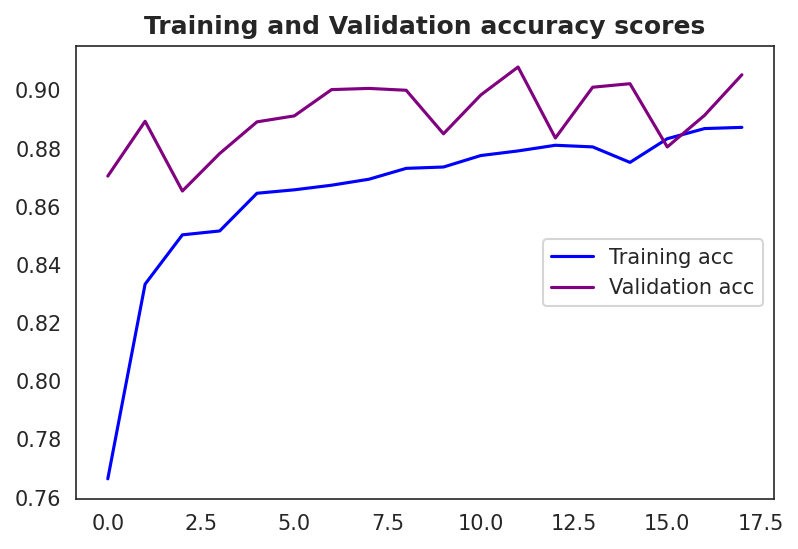

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,8));
plt.figure(dpi=150) 

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')
plt.title('Training and Validation accuracy scores', fontsize=12, fontweight='bold')
plt.legend(loc='center right');

plt.figure();